### The Facebook Followers dataset has been used for exploratory analysis. This dataset is published on the data incubator blog for data analysis. 
### This project tackles the below question using the talking about metric:
### Who are the top 5 companies of talking about by Facebook followers and what is the trend of the top winner? 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
%matplotlib inline

In [2]:
data = pd.read_csv("C:\\Users\\dwnt2427\\PythonNotebooks\\Data_Incubator_competition\\temp_datalab_records_social_facebook.csv") 

C:\Users\dwnt2427\AppData\Local\Continuum\anaconda3\envs\dlnd-tf-lab\lib\site-packages\IPython\core\interactiveshell.py:2717: DtypeWarning: Columns (9) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
data.head(5)

,dataset_id,time,username,checkins,has_added_app,were_here_count,likes,talking_about_count,facebook_id,date_added,date_updated,entity_id,cusip,isin
0,53088,2015-01-01 05:00:00+00,SodaStream,0,f,0,761533,587,54885616308,NaN,2017-02-14 03:35:13.236826+00,NaN,NaN,NaN
1,52642,2015-01-01 05:00:00+00,ANSYSInc,148,f,0,43442,1305,160242297413411,NaN,2017-02-14 01:55:52.78506+00,NaN,NaN,NaN
2,53656,2015-01-01 05:00:00+00,MyAquaAmerica,0,f,0,5591,297,591693544195818,NaN,2017-02-14 08:13:51.267343+00,NaN,NaN,NaN
3,53033,2015-01-01 05:00:00+00,Qualcomm,173,f,0,1232521,2685,108472637291,NaN,2017-02-14 03:24:04.363035+00,NaN,NaN,NaN
4,52783,2015-01-01 05:00:00+00,eaglepharmaceuticals,0,f,0,18,0,1428265940729350,NaN,2017-02-14 02:22:10.193588+00,NaN,NaN,NaN


In [4]:
data.shape

(3621391, 14)

In [5]:
data = data[pd.notnull(data['username'])]

In [6]:
data.shape

(3500462, 14)

In [7]:
df_talk_about = data[['username', 'talking_about_count']] 
df_talk_about.head(5)
df_talk_about.shape

(3500462, 2)

In [8]:
df_talk_about_grouped = df_talk_about.groupby(['username'], as_index=False).agg({"talking_about_count": "sum"})
df_talk_about_grouped.head(5)

,username,talking_about_count
0,1011News,13775631
1,1019thewolf,12471475
2,1027WGUS,3140
3,105.7WROR,290106
4,1079mixfm,4648436


In [9]:
# sort in descending order
df_talk_about_grouped = df_talk_about_grouped.sort_values(by='talking_about_count', ascending=False)
df_talk_about_grouped.head(5)

,username,talking_about_count
4056,manchesterunited,1992699726
4921,wwe,1516594798
4236,nytimes,1147572240
646,CollegeHumor,833458766
838,ESPN,807814872


In [13]:
# Convert time from object to datetime
data['time'] = pd.to_datetime(data['time'])
data.head(5)

,dataset_id,time,username,checkins,has_added_app,were_here_count,likes,talking_about_count,facebook_id,date_added,date_updated,entity_id,cusip,isin
0,53088,2015-01-01 05:00:00,SodaStream,0,f,0,761533,587,54885616308,NaN,2017-02-14 03:35:13.236826+00,NaN,NaN,NaN
1,52642,2015-01-01 05:00:00,ANSYSInc,148,f,0,43442,1305,160242297413411,NaN,2017-02-14 01:55:52.78506+00,NaN,NaN,NaN
2,53656,2015-01-01 05:00:00,MyAquaAmerica,0,f,0,5591,297,591693544195818,NaN,2017-02-14 08:13:51.267343+00,NaN,NaN,NaN
3,53033,2015-01-01 05:00:00,Qualcomm,173,f,0,1232521,2685,108472637291,NaN,2017-02-14 03:24:04.363035+00,NaN,NaN,NaN
4,52783,2015-01-01 05:00:00,eaglepharmaceuticals,0,f,0,18,0,1428265940729350,NaN,2017-02-14 02:22:10.193588+00,NaN,NaN,NaN


In [14]:
# zoom in the trend of talking_about_count of manchesterunited that shows a decline in the trend although it is ranked the first
# with highest volatility of “talking about count” compared to the rest of the userids
df_talk_about_time_talking = data[['time', 'username', 'talking_about_count']] 
df_talk_about_time_talking_filtered = df_talk_about_time_talking[df_talk_about_time_talking['username'] == 'manchesterunited']
df_talk_about_time_talking_filtered.head(3)

,time,username,talking_about_count
3821,2015-01-12 05:00:00,manchesterunited,2372102
4351,2015-01-13 05:00:00,manchesterunited,2596679
4763,2015-01-14 05:00:00,manchesterunited,2639576


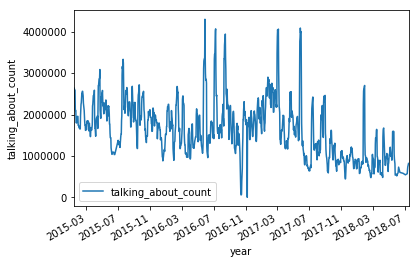

In [247]:
# This plot shows the talking about counts of Manchester united from 2015 to 2018
fig, ax = plt.subplots()

df_talk_about_time_talking_filtered.plot(ax=ax, x='time', y='talking_about_count', kind='line')
ax.set_xlabel("year")
ax.set_ylabel("talking_about_count")
plt.show()

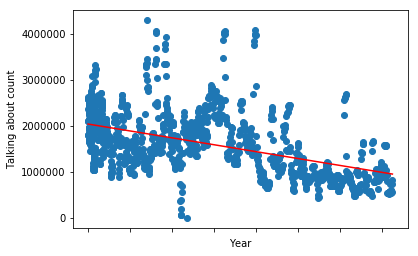

In [15]:
# plot the trend of Manchester united from 2015 to 2018
from scipy.stats import linregress

x = df_talk_about_time_talking_filtered.index
y = df_talk_about_time_talking_filtered['talking_about_count']

stats = linregress(x, y)

m = stats.slope
b = stats.intercept

fig, ax = plt.subplots()

ax.scatter(x, y)
ax.set_xlabel("Year")
ax.set_ylabel("Talking about count")

ax.set_xticklabels([])
    
ax.plot(x, m * x + b, color="red")   # plot a regression line

### Analysis of the scatter Diagram
#### The diagram showed that the top five winners are manchesterunited, wwe, nytimes, CollegeHumor, and ESPN.
#### The first diagram showed that there is a dramatic decrease of the talking in the second half of 2016. It also demonstrates that there is a trend of decrease of the talking about count metric on manchesterunited from 2015 to 2018 plot.